In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from networkx.algorithms.bipartite.basic import density, color

In [5]:
df = pd.read_csv('../data/data_science_job.csv')

In [6]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0


In [7]:
df.describe()

,enrollee_id,city_development_index,experience,training_hours,target
count,19158.000000,18679.000000,19093.000000,18392.000000,19158.000000
mean,16875.358179,0.828951,9.928036,65.185787,0.249348
std,9616.292592,0.123334,6.505268,59.885626,0.432647
min,1.000000,0.448000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,88.000000,0.000000
max,33380.000000,0.949000,20.000000,336.000000,1.000000


In [10]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [11]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [12]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
14643,0.939,no_enrollment,Masters,9.0,10.0
337,0.913,no_enrollment,Masters,20.0,143.0
5908,0.855,no_enrollment,Graduate,3.0,42.0
10881,0.855,no_enrollment,Graduate,18.0,48.0
439,0.766,Full time course,Graduate,15.0,30.0


In [13]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [14]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

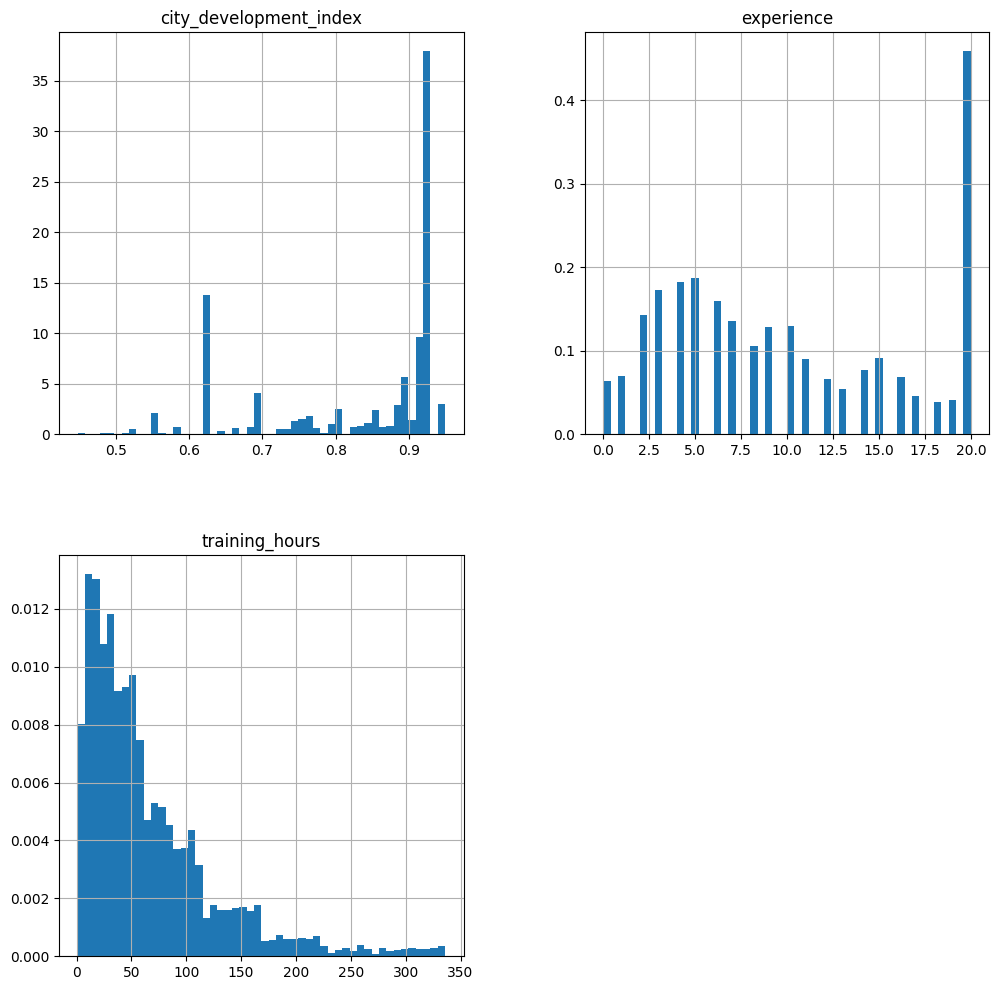

In [15]:
new_df.hist(bins=50, density= True, figsize=(12, 12))
plt.show()

<Axes: >

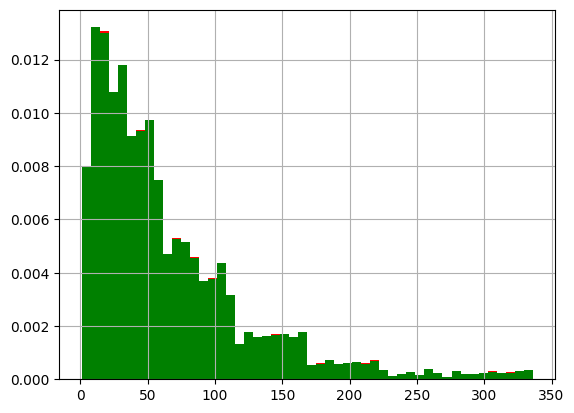

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Original data
df['training_hours'].hist(bins=50, ax = ax, density=True, color='red')

#Data after cca
new_df['training_hours'].hist(bins=50, ax = ax, density=True, color='green')


<Axes: >

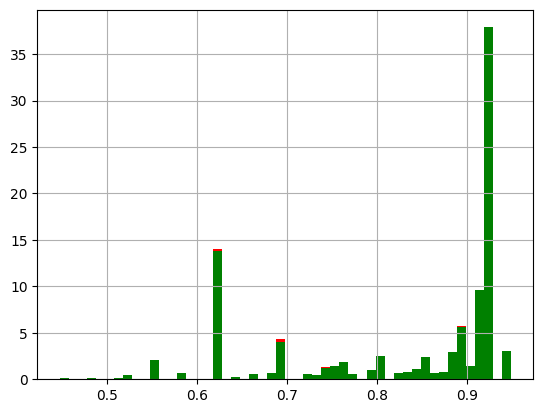

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Original data
df['city_development_index'].hist(bins=50, ax = ax, density=True, color='red')

#Data after cca
new_df['city_development_index'].hist(bins=50, ax = ax, density=True, color='green')

<Axes: >

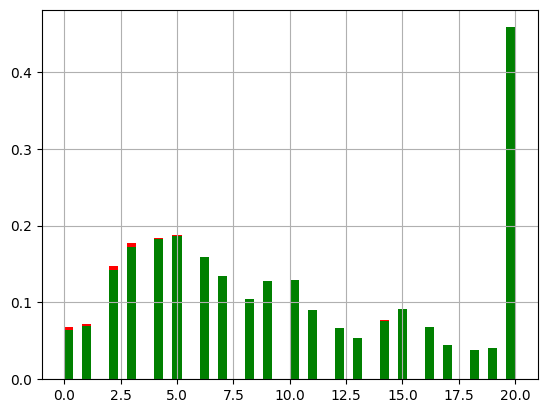

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Original data
df['experience'].hist(bins=50, ax = ax, density=True, color='red')

#Data after cca
new_df['experience'].hist(bins=50, ax = ax, density=True, color='green')